# 1. Import necessary libraries


In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

# 2- Data Cleaning and Preprocessing


In [190]:
df1 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
df1.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [191]:
print("About Dataset:")
df1.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [192]:
df2 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
df2.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [193]:
print("About Dataset:")
df2.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [194]:
df2.isnull().sum()


date           0
dcoilwtico    43
dtype: int64

In [195]:
df3 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
df3.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [196]:
print("About Dataset:")
df3.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [197]:
df4 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
df4.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [198]:
print("About Dataset:")
df4.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [199]:
df5 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
df5.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [200]:
print("About Dataset:")
df5.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [201]:
df6 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
df6.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [202]:
print("About Dataset:")
df6.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [203]:
df7 = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")
df7.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [204]:
print("About Dataset:")
df7.info()

About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# 2- merge the data

rename the data sets

In [205]:
holiday = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv")
sample_submission = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv")
stores = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
test = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/test.csv")
transactions = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv")
train = pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv")


In [206]:
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
transactions["date"] = pd.to_datetime(transactions.date)
holiday["date"] = pd.to_datetime(holiday.date)
oil["date"] = pd.to_datetime(oil.date)

In [207]:
def merge_with_lagged_features(df, oil, holidays):
        # Merge the oil price data with a lag of 7 days
    df = df.merge(oil.assign(date=oil['date'] + pd.DateOffset(days=7)), on='date', how='left', suffixes=('', '_lag_7'))
        # Merge holiday events data

    df = df.merge(holidays, on='date', how='left')
    return df

df = merge_with_lagged_features(train, oil, holiday)
test = merge_with_lagged_features(test, oil, holiday)
df = df.merge(stores, on='store_nbr', how='left')
df = df.merge(transactions, on=['date', 'store_nbr'], how='left')
df = df.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   dcoilwtico    float64       
 7   holiday_type  object        
 8   locale        object        
 9   locale_name   object        
 10  description   object        
 11  transferred   object        
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [209]:
df.isnull().sum()


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       964062
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dtype: int64

In [210]:
df = df.drop(columns=['id', 'cluster', 'locale_name'])
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,description,transferred,city,state,store_type,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Holiday,National,Primer dia del ano,False,Quito,Pichincha,D,NaN
1,2013-01-01,1,BABY CARE,0.0,0,NaN,Holiday,National,Primer dia del ano,False,Quito,Pichincha,D,NaN
2,2013-01-01,1,BEAUTY,0.0,0,NaN,Holiday,National,Primer dia del ano,False,Quito,Pichincha,D,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Holiday,National,Primer dia del ano,False,Quito,Pichincha,D,NaN
4,2013-01-01,1,BOOKS,0.0,0,NaN,Holiday,National,Primer dia del ano,False,Quito,Pichincha,D,NaN


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   dcoilwtico    float64       
 6   holiday_type  object        
 7   locale        object        
 8   description   object        
 9   transferred   object        
 10  city          object        
 11  state         object        
 12  store_type    object        
 13  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 326.2+ MB


# 3- EDA

In [212]:
df.describe()

,date,store_nbr,sales,onpromotion,dcoilwtico,transactions
count,3054348,3.054348e+06,3.054348e+06,3.054348e+06,2.090286e+06,2.805231e+06
mean,2015-04-26 12:11:45.717619456,2.750000e+01,3.590209e+02,2.617480e+00,6.807354e+01,1.697071e+03
min,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,5.000000e+00
25%,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.638000e+01,1.046000e+03
50%,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,5.346000e+01,1.395000e+03
75%,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,9.582000e+01,2.081000e+03
max,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,8.359000e+03
std,NaN,1.558579e+01,1.107286e+03,1.225494e+01,2.569465e+01,9.668317e+02


In [213]:
df.shape


(3054348, 14)

In [214]:
df.dtypes


date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
dcoilwtico             float64
holiday_type            object
locale                  object
description             object
transferred             object
city                    object
state                   object
store_type              object
transactions           float64
dtype: object

get_dummies() function to perform one-hot encoding.Creates a binary (0 or 1) column for each category

In [215]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [216]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,date,store_nbr,sales,onpromotion,dcoilwtico,transactions,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,state_Manabi,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,store_type_B,store_type_C,store_type_D,store_type_E
date,1.000000e+00,6.090739e-15,0.086046,0.206016,-8.401439e-01,-0.028331,1.855221e-15,2.596019e-15,4.295885e-15,4.641503e-15,...,5.726337e-15,-2.216153e-15,-4.907158e-15,-1.599555e-15,3.672445e-15,-7.499985e-16,1.978313e-14,-4.037423e-15,-1.194888e-14,5.654223e-15
store_nbr,6.090739e-15,1.000000e+00,0.041273,0.007744,3.151298e-15,0.189656,-7.834094e-19,-7.969873e-19,1.899409e-19,-1.814241e-19,...,3.968141e-01,-4.847258e-02,-3.172274e-01,-2.203299e-02,-2.100780e-01,1.132471e-01,-1.237511e-01,-1.339630e-01,-3.100195e-01,1.179586e-01
sales,8.604562e-02,4.127337e-02,1.000000,0.428241,-7.872563e-02,0.214848,-5.729939e-02,-5.672104e-02,3.250274e-01,-5.730593e-02,...,-4.554415e-02,-3.532317e-02,1.311102e-01,-1.897620e-02,-3.137142e-02,8.546863e-04,-1.157951e-02,-9.030258e-02,-4.429537e-03,-2.266638e-02
onpromotion,2.060158e-01,7.744102e-03,0.428241,1.000000,-1.527650e-01,0.025809,-3.774841e-02,-3.558052e-02,1.073041e-01,-3.775698e-02,...,-5.597723e-03,-9.117535e-03,2.198845e-02,-6.311523e-03,-3.164776e-03,1.869909e-03,8.108550e-03,-2.582357e-02,5.490883e-03,2.448424e-03
dcoilwtico,-8.401439e-01,3.151298e-15,-0.078726,-0.152765,1.000000e+00,0.018192,6.004882e-16,1.048213e-15,-1.044465e-18,-1.976408e-16,...,-5.926195e-15,2.164647e-16,7.448842e-15,4.456513e-16,2.087814e-15,-3.100704e-15,-1.321424e-14,4.890121e-15,6.671735e-15,-9.830460e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state_Tungurahua,-7.499985e-16,1.132471e-01,0.000855,0.001870,-3.100704e-15,0.031125,1.256301e-19,2.395563e-19,3.828729e-19,2.560191e-19,...,-4.756515e-02,-2.693862e-02,-1.444961e-01,-2.693862e-02,-4.756515e-02,1.000000e+00,-8.178608e-02,-1.216261e-01,6.933752e-02,-5.547002e-02
store_type_B,1.978313e-14,-1.237511e-01,-0.011580,0.008109,-1.321424e-14,0.025372,2.698728e-19,8.660625e-20,-9.794732e-20,2.559202e-20,...,-1.011443e-01,-5.728332e-02,1.293735e-01,-5.728332e-02,1.264304e-01,-8.178608e-02,1.000000e+00,-2.586303e-01,-2.948839e-01,-1.179536e-01
store_type_C,-4.037423e-15,-1.339630e-01,-0.090303,-0.025824,4.890121e-15,-0.436544,6.744014e-20,-9.686615e-20,-7.283787e-19,-4.344811e-19,...,3.008284e-02,2.214873e-01,-2.837818e-01,-8.518741e-02,3.008284e-02,-1.216261e-01,-2.586303e-01,1.000000e+00,-4.385290e-01,-1.754116e-01
store_type_D,-1.194888e-14,-3.100195e-01,-0.004430,0.005491,6.671735e-15,-0.056534,-1.543579e-19,-1.376162e-20,7.825429e-20,-1.944058e-20,...,-1.230437e-18,-9.712859e-02,5.484085e-02,1.942572e-01,-7.751657e-18,6.933752e-02,-2.948839e-01,-4.385290e-01,1.000000e+00,-2.000000e-01


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


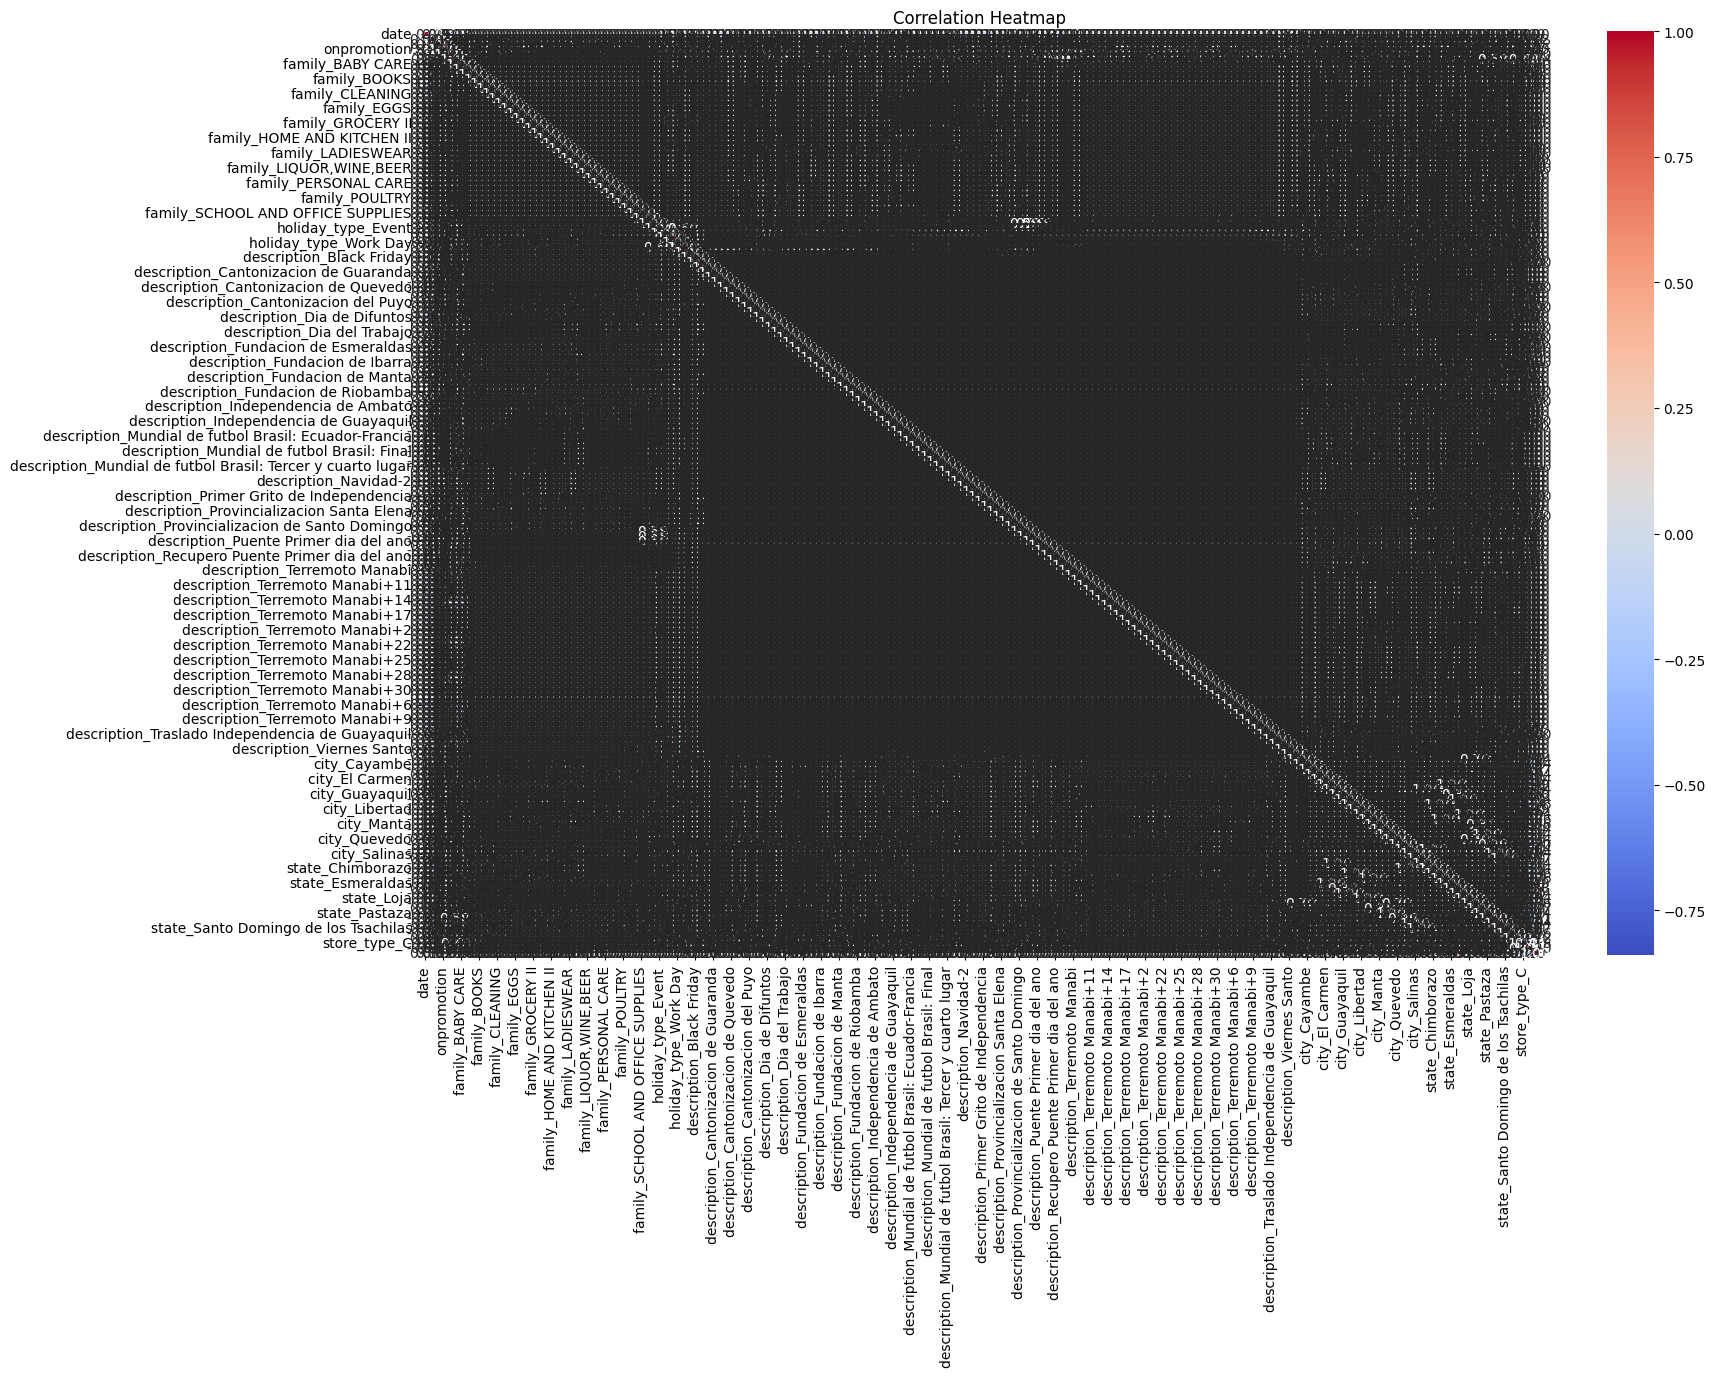

In [217]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### How are sales changing over time?


<Axes: title={'center': 'Total Sales Over Time'}, xlabel='date'>

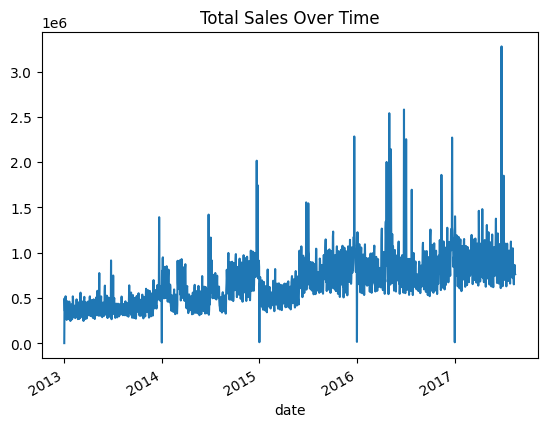

In [218]:
df.groupby('date')['sales'].sum().plot(title="Total Sales Over Time")


### Do holidays affect sales?



In [219]:
holiday_sales=df.groupby('holiday_type')['sales'].mean()
holiday_sales 

holiday_type
Additional    487.628925
Bridge        446.750854
Event         425.660065
Holiday       358.433812
Transfer      467.753110
Work Day      372.157524
Name: sales, dtype: float64

<Axes: title={'center': 'Average Sales by Holiday Type'}, xlabel='holiday_type'>

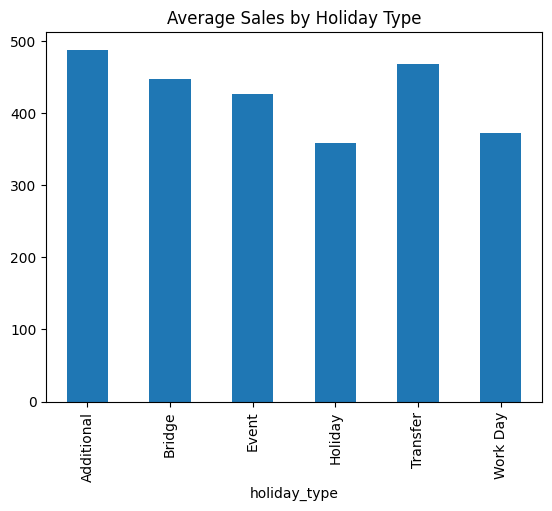

In [220]:
holiday_sales.plot(kind='bar', title='Average Sales by Holiday Type')


Additional holidays seem to generate the highest average sales (~487.63). 

Transfers also seem to lead to higher-than-average sales (~467.75).

Regular holidays (Holiday and Work Day) generate relatively lower sales on average compared to other holiday types.